In [1]:
# Import stuff: 
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sympy import Symbol
from sympy.solvers import solve

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.linewidth': 5
             }
plt.rcParams.update(parameters)

L = 100
N = 3000
D_const = 0.1
v_const = 0.1
r_const = 0.01
H = 0.2
K = 10
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 19106
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.26779284e-04, 2.49457212e-03, ...,
       9.99255054e+01, 9.99652966e+01, 1.00000000e+02])
 t_events: None
        y: array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.05999517e-02,  2.05774240e-02,  2.05598310e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         9.30333131e-04,  9.32029532e-04,  9.30426518e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.64233562e-31,  3.60308118e-31,  1.94920889e-31],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.06069453e-31, -2.2

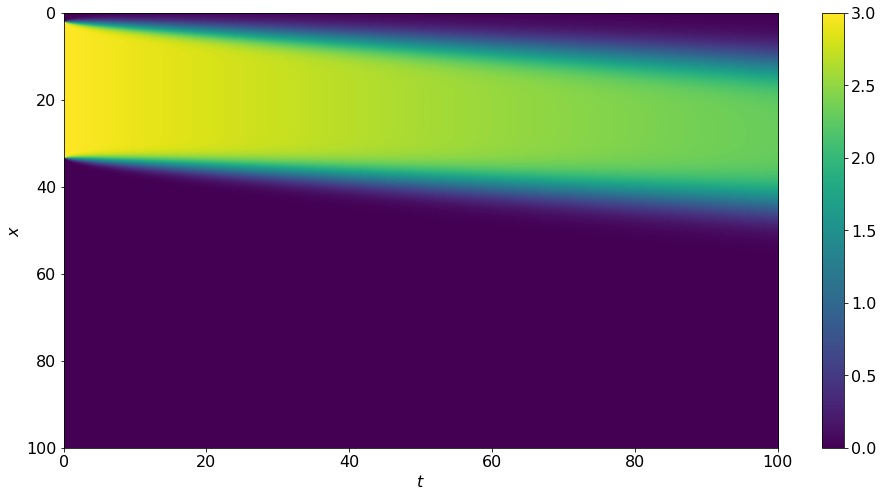

dict_items([('L', 100), ('N', 3000), ('D_const', 0.1), ('v_const', 0.1), ('r_const', 0.01), ('H', 0.2), ('K', 10)])


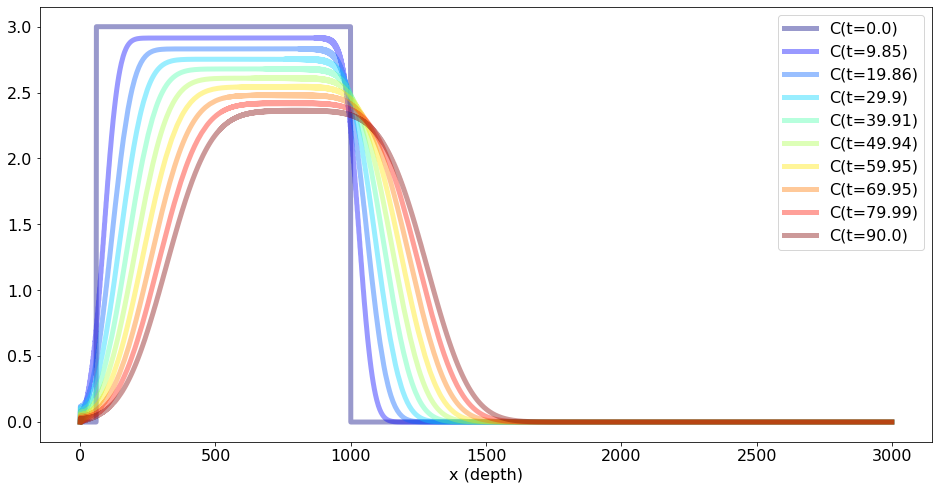

In [2]:
# Parameters: 
# TODO: use the real values
# params_dict = dict(
#     L = 150, #100
#     N = 1000, 
#     D_const = 0.5, #0.0001
#     v_const = 0. , #0.0001
#     r_const = 0.2, ##0.0001
#     H = 30, #2
#     K = 300 #10
# )

params_dict = dict(
    L = 100, #100
    N = 3000, 
    D_const = 0.1, #0.0001
    v_const = 0.1 , #0.0001
    r_const = 0.01, ##0.0001
    H = 0.2, #2
    K = 10 #10
)

for k, v in params_dict.items():
    assign_str = f"{k} = {v}"
    exec(assign_str)
    print(assign_str)

ddx = lambda arr, delta: np.array([arr[0]] + list((np.diff(arr[:-1]) + np.diff(arr[1:]))/(2*delta)) + [arr[-1]])

# arr is the states of C / the states of J

#def ddx2(arr, delta): 
#    arr[1:-1] = (arr[2:] - 2*arr[1:-1] + arr[:-2])/(delta**2)
#    return arr


#Simple funtions defining diffusion, advection and reaction 
D = lambda x, t: D_const
v = lambda x, t: v_const
r = lambda x, t: r_const

# Flux:  
J = lambda c, x, t, delta: c*v(x, t) - D(x, t)*ddx(c, delta)

# Intrinsic growth
f = lambda c, x, t: r(x, t)*c*(np.exp(- x/H) - c/K) 


def DAR(t, state, *params):
        
    for key, val in params:
        assign_str = f"{key} = {val}"
        exec(assign_str)
    
    deltax = L/N
    x_list = np.arange(0, L, deltax)
    
    C = state
    dCdt = -ddx(J(C, x_list, t, deltax), deltax) + f(C, x_list, t)
    
    return np.array(dCdt)

#C_init = np.ones(N)

C_init = np.zeros(N)
#C_init[int(N*1/3):int(N*2/3)] = 3

C_init[int(N*1/50):int(N*2/6)] = 3
#C_init[int(N*3/6):int(N*4/6)] = 100
#C_init[int(N*5/6):int(N*5/6)] = 100

params = tuple(params_dict.items())

#t_list = np.linspace(0, 200, 5000)
num_sol = solve_ivp(DAR, (0, 100), C_init, args=params)
#num_sol = solve_ivp(DAR, (0, 5), C_init, args=params)

print(num_sol)


ns = num_sol.y
t_list = num_sol.t
#x_list = np.arange(0, L, deltax)

fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(ns, aspect="auto", extent=[t_list[0], t_list[-1], L, 0])
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
fig.colorbar(im,)

filename = "DAR_heatmap"
plt.savefig(f"../figs/{filename}.png")
plt.savefig(f"../figs/{filename}.pdf")
plt.show()
print(params_dict.items())


fig, ax = plt.subplots(figsize=(16,8))
num_levels = 10
levels = [int(k*len(ns.T)/num_levels) for k in range(num_levels)]
colors = plt.cm.jet(np.linspace(0,1,num_levels))
for i, l in enumerate(levels):
    ax.plot(ns.T[l], color=colors[i], alpha=0.4, label=f"C(t={round(t_list[l],2)})")
    ax.set_xlabel("x (depth)")
ax.legend(loc="upper right")

filename = "DAR_profile"
plt.savefig(f"../figs/{filename}.png")
plt.savefig(f"../figs/{filename}.pdf")
plt.show()

L = 100
N = 3000
D_const = 0.1
v_const = 0.1
r_const = 0.01
H = 0.2
K = 10
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 19106
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.26779284e-04, 2.49457212e-03, ...,
       9.99455291e+01, 9.99858933e+01, 1.00000000e+02])
 t_events: None
        y: array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.53067433e-02,  5.52666883e-02,  5.52599179e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.55620372e-03,  2.56325063e-03,  2.55131780e-03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         9.40795100e-31,  1.38323709e-30,  4.09940490e-31],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.01278102e-31, -8.9

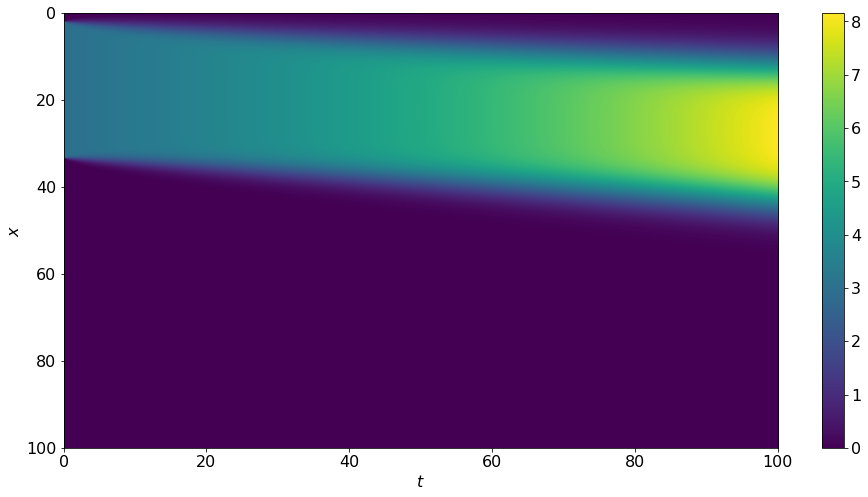

dict_items([('L', 100), ('N', 3000), ('D_const', 0.1), ('v_const', 0.1), ('r_const', 0.01), ('H', 0.2), ('K', 10)])


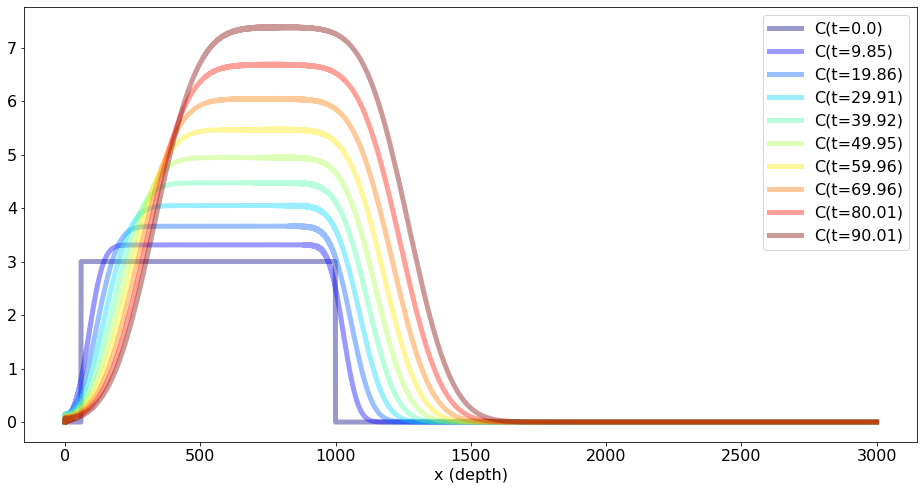

In [3]:
# Parameters: 
# TODO: use the real values
# params_dict = dict(
#     L = 150, #100
#     N = 1000, 
#     D_const = 0.5, #0.0001
#     v_const = 0. , #0.0001
#     r_const = 0.2, ##0.0001
#     H = 30, #2
#     K = 300 #10
# )

params_dict = dict(
    L = 100, #100
    N = 3000, 
    D_const = 0.1, #0.0001
    v_const = 0.1 , #0.0001
    r_const = 0.01, ##0.0001
    H = 0.2, #2
    K = 10 #10
)

for k, v in params_dict.items():
    assign_str = f"{k} = {v}"
    exec(assign_str)
    print(assign_str)

ddx = lambda arr, delta: np.array([arr[0]] + list((np.diff(arr[:-1]) + np.diff(arr[1:]))/(2*delta)) + [arr[-1]])

# arr is the states of C / the states of J

#def ddx2(arr, delta): 
#    arr[1:-1] = (arr[2:] - 2*arr[1:-1] + arr[:-2])/(delta**2)
#    return arr


#Simple funtions defining diffusion, advection and reaction 
D = lambda x, t: D_const
v = lambda x, t: v_const
r = lambda x, t: r_const

# Flux:  
J = lambda c, x, t, delta: c*v(x, t) - D(x, t)*ddx(c, delta)

# Intrinsic growth
f = lambda c, x, t: r(x, t)*c#*(np.exp(- x/H) - c/K) 


def DAR(t, state, *params):
        
    for key, val in params:
        assign_str = f"{key} = {val}"
        exec(assign_str)
    
    deltax = L/N
    x_list = np.arange(0, L, deltax)
    
    C = state
    dCdt = -ddx(J(C, x_list, t, deltax), deltax) + f(C, x_list, t)
    
    return np.array(dCdt)

#C_init = np.ones(N)

C_init = np.zeros(N)
#C_init[int(N*1/3):int(N*2/3)] = 3

C_init[int(N*1/50):int(N*2/6)] = 3
#C_init[int(N*3/6):int(N*4/6)] = 100
#C_init[int(N*5/6):int(N*5/6)] = 100

params = tuple(params_dict.items())

#t_list = np.linspace(0, 200, 5000)
num_sol = solve_ivp(DAR, (0, 100), C_init, args=params)
#num_sol = solve_ivp(DAR, (0, 5), C_init, args=params)

print(num_sol)


ns = num_sol.y
t_list = num_sol.t
#x_list = np.arange(0, L, deltax)

fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(ns, aspect="auto", extent=[t_list[0], t_list[-1], L, 0])
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
fig.colorbar(im,)

filename = "DAR_heatmap"
plt.savefig(f"../figs/{filename}.png")
plt.savefig(f"../figs/{filename}.pdf")
plt.show()
print(params_dict.items())


fig, ax = plt.subplots(figsize=(16,8))
num_levels = 10
levels = [int(k*len(ns.T)/num_levels) for k in range(num_levels)]
colors = plt.cm.jet(np.linspace(0,1,num_levels))
for i, l in enumerate(levels):
    ax.plot(ns.T[l], color=colors[i], alpha=0.4, label=f"C(t={round(t_list[l],2)})")
    ax.set_xlabel("x (depth)")
ax.legend(loc="upper right")

filename = "DAR_profile"
plt.savefig(f"../figs/{filename}.png")
plt.savefig(f"../figs/{filename}.pdf")
plt.show()

L = 100
N = 3000
D_const = 0.1
v_const = 0.1
r_const = 0.01
H = 0.2
K = 10
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 18614
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.26779284e-04, 2.49457212e-03, ...,
       9.99253855e+01, 9.99631276e+01, 1.00000000e+02])
 t_events: None
        y: array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.17109256e-02,  5.16782992e-02,  5.16467293e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.36977013e-03,  2.36977528e-03,  2.36837782e-03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         9.71396504e-32, -1.05007136e-32, -1.42870450e-31],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.54531373e-31, -3.1

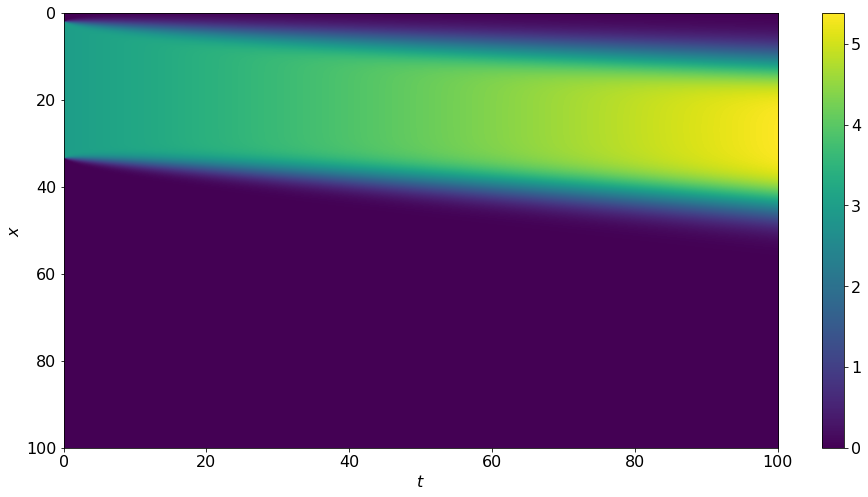

dict_items([('L', 100), ('N', 3000), ('D_const', 0.1), ('v_const', 0.1), ('r_const', 0.01), ('H', 0.2), ('K', 10)])


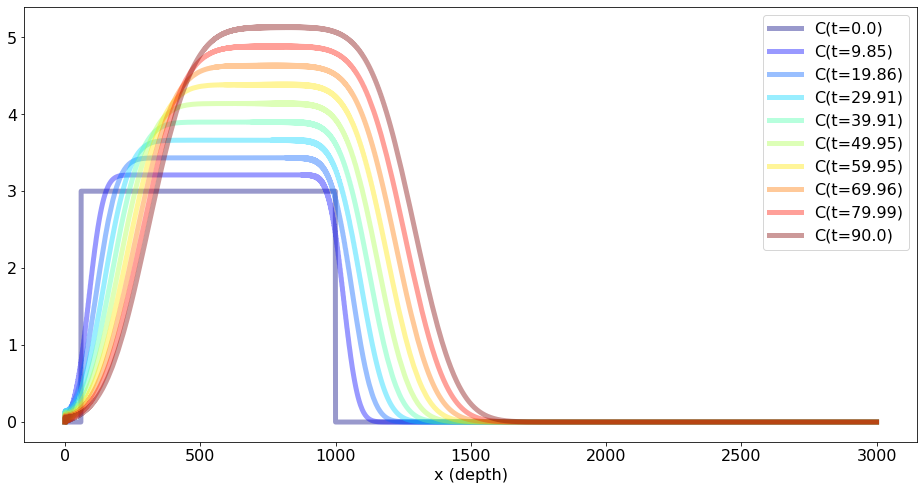

In [7]:
# Parameters: 
# TODO: use the real values
# params_dict = dict(
#     L = 150, #100
#     N = 1000, 
#     D_const = 0.5, #0.0001
#     v_const = 0. , #0.0001
#     r_const = 0.2, ##0.0001
#     H = 30, #2
#     K = 300 #10
# )

params_dict = dict(
    L = 100, #100
    N = 3000, 
    D_const = 0.1, #0.0001
    v_const = 0.1 , #0.0001
    r_const = 0.01, ##0.0001
    H = 0.2, #2
    K = 10 #10
)

for k, v in params_dict.items():
    assign_str = f"{k} = {v}"
    exec(assign_str)
    print(assign_str)

ddx = lambda arr, delta: np.array([arr[0]] + list((np.diff(arr[:-1]) + np.diff(arr[1:]))/(2*delta)) + [arr[-1]])

# arr is the states of C / the states of J

#def ddx2(arr, delta): 
#    arr[1:-1] = (arr[2:] - 2*arr[1:-1] + arr[:-2])/(delta**2)
#    return arr


#Simple funtions defining diffusion, advection and reaction 
D = lambda x, t: D_const
v = lambda x, t: v_const
r = lambda x, t: r_const

# Flux:  
J = lambda c, x, t, delta: c*v(x, t) - D(x, t)*ddx(c, delta)

# Intrinsic growth
f = lambda c, x, t: r(x, t)*c*(1 - c/K) 


def DAR(t, state, *params):
        
    for key, val in params:
        assign_str = f"{key} = {val}"
        exec(assign_str)
    
    deltax = L/N
    x_list = np.arange(0, L, deltax)
    
    C = state
    dCdt = -ddx(J(C, x_list, t, deltax), deltax) + f(C, x_list, t)
    
    return np.array(dCdt)

#C_init = np.ones(N)

C_init = np.zeros(N)
#C_init[int(N*1/3):int(N*2/3)] = 3

C_init[int(N*1/50):int(N*2/6)] = 3
#C_init[int(N*3/6):int(N*4/6)] = 100
#C_init[int(N*5/6):int(N*5/6)] = 100

params = tuple(params_dict.items())

#t_list = np.linspace(0, 200, 5000)
num_sol = solve_ivp(DAR, (0, 100), C_init, args=params)
#num_sol = solve_ivp(DAR, (0, 5), C_init, args=params)

print(num_sol)


ns = num_sol.y
t_list = num_sol.t
#x_list = np.arange(0, L, deltax)

fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(ns, aspect="auto", extent=[t_list[0], t_list[-1], L, 0])
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
fig.colorbar(im,)

filename = "DAR_heatmap"
plt.savefig(f"../figs/{filename}.png")
plt.savefig(f"../figs/{filename}.pdf")
plt.show()
print(params_dict.items())


fig, ax = plt.subplots(figsize=(16,8))
num_levels = 10
levels = [int(k*len(ns.T)/num_levels) for k in range(num_levels)]
colors = plt.cm.jet(np.linspace(0,1,num_levels))
for i, l in enumerate(levels):
    ax.plot(ns.T[l], color=colors[i], alpha=0.4, label=f"C(t={round(t_list[l],2)})")
    ax.set_xlabel("x (depth)")
ax.legend(loc="upper right")

filename = "DAR_profile"
plt.savefig(f"../figs/{filename}.png")
plt.savefig(f"../figs/{filename}.pdf")
plt.show()

L = 100
N = 3000
D_const = 0.1
v_const = 0.1
r_const = 0.01
H = 0.02
K = 10
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 19202
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.26779284e-04, 2.49457212e-03, ...,
       9.99313943e+01, 9.99717329e+01, 1.00000000e+02])
 t_events: None
        y: array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.04536148e-02,  2.04301700e-02,  2.04179245e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         9.43491240e-04,  9.45431993e-04,  9.41430344e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.24251280e-31,  6.69000544e-31,  1.52743086e-31],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.18835959e-31, -2.

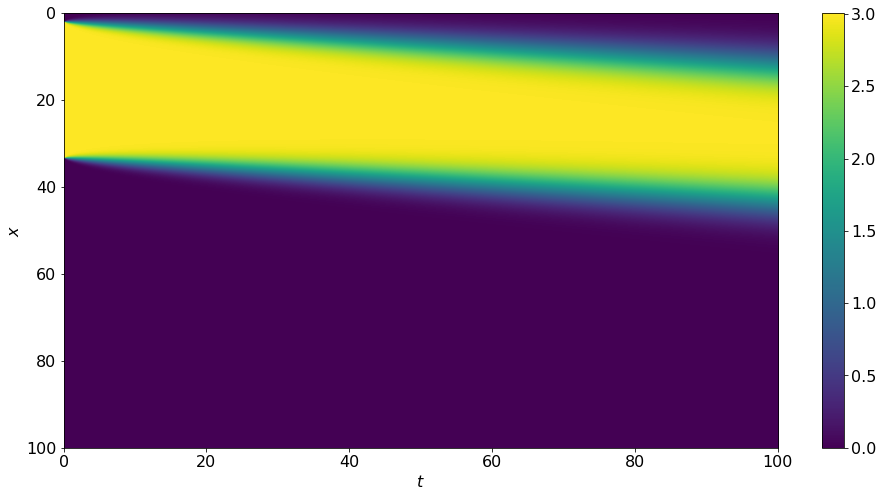

dict_items([('L', 100), ('N', 3000), ('D_const', 0.1), ('v_const', 0.1), ('r_const', 0.01), ('H', 0.02), ('K', 10)])


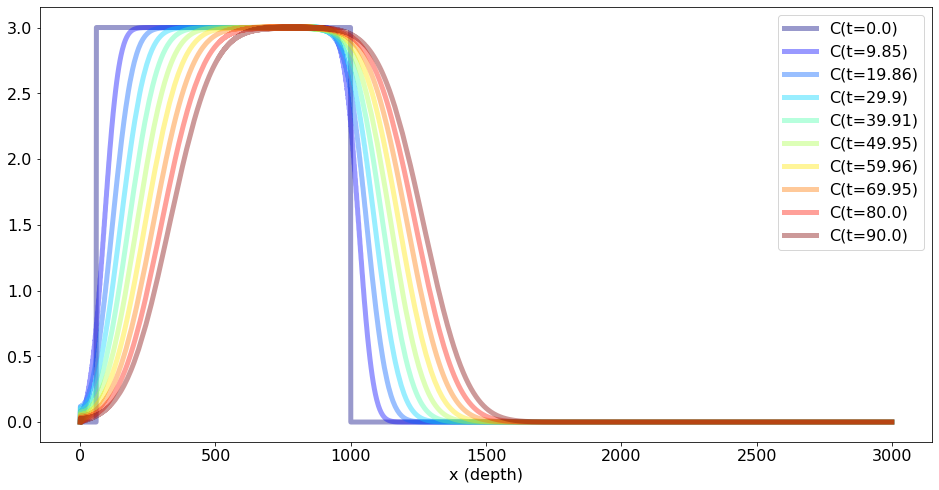

In [9]:
# why does this one looks like this???

# Parameters: 
# TODO: use the real values
# params_dict = dict(
#     L = 150, #100
#     N = 1000, 
#     D_const = 0.5, #0.0001
#     v_const = 0. , #0.0001
#     r_const = 0.2, ##0.0001
#     H = 30, #2
#     K = 300 #10
# )

params_dict = dict(
    L = 100, #100
    N = 3000, 
    D_const = 0.1, #0.0001
    v_const = 0.1 , #0.0001
    r_const = 0.01, ##0.0001
    H = 0.02, #2
    K = 10 #10
)

for k, v in params_dict.items():
    assign_str = f"{k} = {v}"
    exec(assign_str)
    print(assign_str)

ddx = lambda arr, delta: np.array([arr[0]] + list((np.diff(arr[:-1]) + np.diff(arr[1:]))/(2*delta)) + [arr[-1]])

# arr is the states of C / the states of J

#def ddx2(arr, delta): 
#    arr[1:-1] = (arr[2:] - 2*arr[1:-1] + arr[:-2])/(delta**2)
#    return arr


#Simple funtions defining diffusion, advection and reaction 
D = lambda x, t: D_const
v = lambda x, t: v_const
r = lambda x, t: r_const

# Flux:  
J = lambda c, x, t, delta: c*v(x, t) - D(x, t)*ddx(c, delta)

# Intrinsic growth
f = lambda c, x, t: r(x, t)*c*(np.exp(- x/H)) 


def DAR(t, state, *params):
        
    for key, val in params:
        assign_str = f"{key} = {val}"
        exec(assign_str)
    
    deltax = L/N
    x_list = np.arange(0, L, deltax)
    
    C = state
    dCdt = -ddx(J(C, x_list, t, deltax), deltax) + f(C, x_list, t)
    
    return np.array(dCdt)

#C_init = np.ones(N)

C_init = np.zeros(N)
#C_init[int(N*1/3):int(N*2/3)] = 3

C_init[int(N*1/50):int(N*2/6)] = 3
#C_init[int(N*3/6):int(N*4/6)] = 100
#C_init[int(N*5/6):int(N*5/6)] = 100

params = tuple(params_dict.items())

#t_list = np.linspace(0, 200, 5000)
num_sol = solve_ivp(DAR, (0, 100), C_init, args=params)
#num_sol = solve_ivp(DAR, (0, 5), C_init, args=params)

print(num_sol)


ns = num_sol.y
t_list = num_sol.t
#x_list = np.arange(0, L, deltax)

fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(ns, aspect="auto", extent=[t_list[0], t_list[-1], L, 0])
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
fig.colorbar(im,)

filename = "DAR_heatmap"
plt.savefig(f"../figs/{filename}.png")
plt.savefig(f"../figs/{filename}.pdf")
plt.show()
print(params_dict.items())


fig, ax = plt.subplots(figsize=(16,8))
num_levels = 10
levels = [int(k*len(ns.T)/num_levels) for k in range(num_levels)]
colors = plt.cm.jet(np.linspace(0,1,num_levels))
for i, l in enumerate(levels):
    ax.plot(ns.T[l], color=colors[i], alpha=0.4, label=f"C(t={round(t_list[l],2)})")
    ax.set_xlabel("x (depth)")
ax.legend(loc="upper right")

filename = "DAR_profile"
plt.savefig(f"../figs/{filename}.png")
plt.savefig(f"../figs/{filename}.pdf")
plt.show()

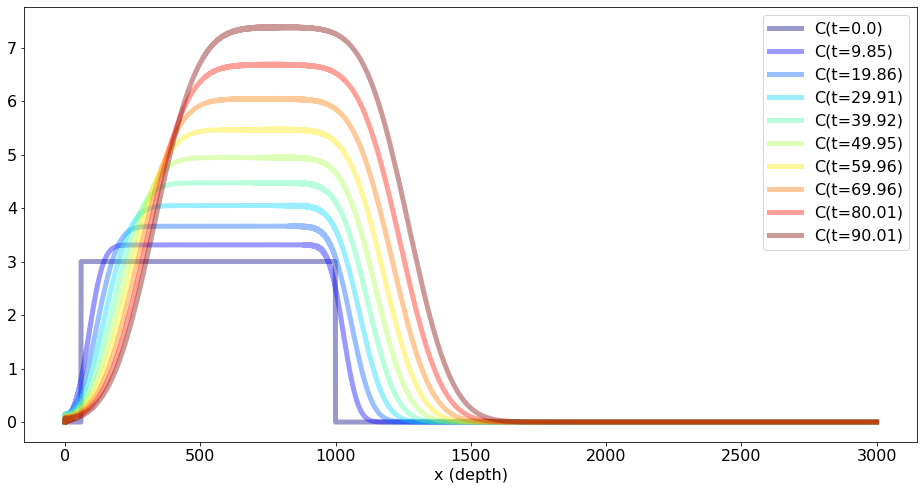

In [4]:
fig, ax = plt.subplots(figsize=(16,8))
num_levels = 10
levels = [int(k*len(ns.T)/num_levels) for k in range(num_levels)]
colors = plt.cm.jet(np.linspace(0,1,num_levels))
for i, l in enumerate(levels):
    ax.plot(ns.T[l], color=colors[i], alpha=0.4, label=f"C(t={round(t_list[l],2)})")
    ax.set_xlabel("x (depth)")
ax.legend(loc="upper right")

filename = "DAR_profile"
plt.savefig(f"../figs/{filename}.png")
plt.savefig(f"../figs/{filename}.pdf")


# What we see here is a demonstration of numerical instability... not to sure how to solve this...

In [5]:
# OLD:

In [6]:
def DAR(state, t, *params):
        
    for key, val in params:
        assign_str = f"{key} = {val}"
        exec(assign_str)
    
    deltax = L/N
    x_list = np.arange(0, L, deltax)
    
    C = state
    dCdt = -ddx(J(C, x_list, t, deltax), deltax) + f(C, x_list, t)
    
    return np.array(dCdt)

#C_init = np.ones(N)

C_init = np.zeros(N)
C_init[int(N*1/3):int(N*2/3)] = 100

#C_init[int(N*1/50):int(N*3/6)] = 100
#C_init[int(N*3/6):int(N*4/6)] = 100
#C_init[int(N*5/6):int(N*5/6)] = 100

params = tuple(params_dict.items())

t_list = np.linspace(0, 100, 5000)
# ns = solve_ivp(DAR, C_init, t_list, args=params, full_output = 1)
ns = odeint(DAR, C_init, t_list, args=params, full_output = 1)

